#Pokemon Regression and Classification analysis

Imported libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

#Regression

Imported data

In [53]:
df = pd.read_csv("pokemon.csv")
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Regression will be performed on two columns: Sp_Atk, Sp_Def
Here is the descrioption of these columns:
- Sp_Atk. Base special attack of the Pokémon. The bigger it is,the more damage its special attacks will deal to the enemy Pokémon.
- • Sp_Def. Base special defense of the Pokémon. The bigger it is, the less damage it will receive when being hit by a special attack.


In [54]:
df2 = df[["Sp_Atk", "Sp_Def"]]
df2.head()

,Sp_Atk,Sp_Def
0,65,65
1,80,80
2,100,100
3,60,50
4,80,65


There are 721 values in both of these columns. There are no NaN values.

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sp_Atk  721 non-null    int64
 1   Sp_Def  721 non-null    int64
dtypes: int64(2)
memory usage: 11.4 KB


In [56]:
df2.describe()

,Sp_Atk,Sp_Def
count,721.000000,721.000000
mean,68.737864,69.291262
std,28.788005,27.015860
min,10.000000,20.000000
25%,45.000000,50.000000
50%,65.000000,65.000000
75%,90.000000,85.000000
max,154.000000,230.000000


The dataset contains a lot of values, so it is better to make samples, that only contains 200 values each.

In [57]:
x1 = df["Sp_Def"][:200]
y =df["Sp_Atk"][:200]

In [58]:
x = sma.add_constant(y)
result = sma.OLS(x1,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Sp_Def   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     77.31
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           7.10e-16
Time:                        19:55:20   Log-Likelihood:                -887.83
No. Observations:                 200   AIC:                             1780.
Df Residuals:                     198   BIC:                             1786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0470      3.773      9.555      0.000      28.607      43.487
Sp_Atk         0.4621      0.053      8.792      0.000       0.358       0.566
==============================================================================
Omnibus:                       11.631   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.970
Skew:                           0.552   Prob(JB):                      0.00252
Kurtosis:                       3.466   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We analyze the values of the two data groups mentioned earlier. However, the crucial output to focus on is the second table, which is the final one. This is because key properties like p-values and the main coefficient are contained in this second table.

Constant coefficient is equal to 36.0470 and independent variable coefficient is equal to 0.4621.

If the p-value associated with the independent variable(s) exceeds 0.050, we conclude that the variable lacks significance, and it can be omitted. In our specific situation, we can assert that this variable is insignificant, as the p-value for 'Sp_Atk' surpasses both 0.000 and 0.050.


To depict the regression line on the graph, just establish the linear regression equation, denoted as y_line = b0 + (b1*x1), where:

- b0 - represents the bias variable coefficient.
- b1 - signifies the coefficients of the input/s variables.

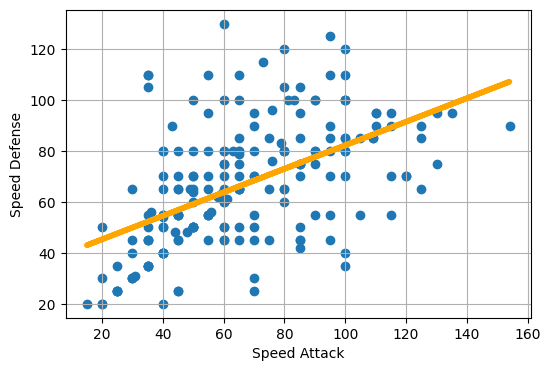

In [59]:
plt.figure(figsize=(6,4))
plt.scatter(y,x1)
yhat=0.4621*y + 36.0470
fig=plt.plot(y,yhat,lw=4,c="orange",label="Regression Line")
plt.grid()
plt.xlabel("Speed Attack")
plt.ylabel("Speed Defense")
plt.show()

#Classification

In [17]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Null values are included in three of the columns in dataset. You can find NaN in 'Type_2', 'Pr_Male' and 'Egg_Group_2' columns.

In [18]:
df.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

Value, that occur the most in the 'Pr_Male' columns is 0.500. Let's fill the null values with this specific value.

In [20]:
df['Pr_Male'].value_counts()

0.500    458
0.875    101
0.000     23
0.250     22
1.000     19
0.750     19
0.125      2
Name: Pr_Male, dtype: int64

In [21]:
df['Pr_Male'].fillna(0.500, inplace = True)
df['Pr_Male'].isnull().sum()

0

Columns 'Type_2' and 'Egg_group' aren't necessary. Let's remove them.

In [22]:
cl_df = df.drop(['Type_2', 'Egg_Group_2'], axis=1)
cl_df.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


Now there are no null values in the dataset.

In [23]:
cl_df.isnull().sum()

Number              0
Name                0
Type_1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

Some of the main pokemon types are very simillar to other types. Let's change some of the less important ones to more general.

In [30]:
poke = cl_df.replace(['Water', 'Ice'], 'Water')
poke = poke.replace(['Grass', 'Bug'], 'Grass')
poke = poke.replace(['Ground', 'Rock'], 'Rock')
poke = poke.replace(['Psychic', 'Dark', 'Ghost', 'Fairy'], 'Dark')
poke = poke.replace(['Electric', 'Steel'], 'Electric')
poke.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [31]:
poke['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Normal', 'Poison', 'Electric', 'Rock',
       'Dark', 'Fighting', 'Dragon', 'Flying'], dtype=object)

Let's convert 'Body_Style' column into numeric.

In [32]:
ref1 = dict(poke['Body_Style'].value_counts())
poke['Body_Style_new'] = poke['Body_Style'].map(ref1)

In [33]:
poke['Body_Style_new'].head()

0    135
1    135
2    135
3    158
4    158
Name: Body_Style_new, dtype: int64

In [34]:
poke['Body_Style'].head()

0         quadruped
1         quadruped
2         quadruped
3    bipedal_tailed
4    bipedal_tailed
Name: Body_Style, dtype: object

In [39]:
pokemon_types = pd.get_dummies(poke['Type_1'])
pokemon_colors = pd.get_dummies(poke['Color'])

X = pd.concat([poke, pokemon_types], axis=1)
X = pd.concat([X, pokemon_colors], axis=1)

X.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Body_Style_new,Dark,Dragon,Electric,Fighting,Fire,Flying,Grass,Normal,Poison,Rock,Water,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed,158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed,158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Text columns mustn't exist during the classification analysis. Let's drop them from the dataset.

In [41]:
X = X.drop(['Number', 'Name', 'Type_1', 'Color', 'Egg_Group_1', 'Body_Style'], axis = 1)
X.shape

(721, 37)

We will be predicting, whether the Pokemon is legendary. Let's create new column with this value.

In [42]:
y = X['isLegendary']
X = X.drop('isLegendary', axis=1)

In [44]:
X.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style_new,Dark,Dragon,Electric,Fighting,Fire,Flying,Grass,Normal,Poison,Rock,Water,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,318,45,49,49,65,65,45,1,True,0.875,False,0.71,6.9,45,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,True,0.875,False,0.99,13.0,45,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,True,0.875,True,2.01,100.0,45,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,309,39,52,43,60,50,65,1,True,0.875,False,0.61,8.5,45,158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,405,58,64,58,80,65,80,1,True,0.875,False,1.09,19.0,45,158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Mapped 'True' and 'False' into 1 and 0.

In [45]:
X.replace({False: 0, True: 1}, inplace=True)
X.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style_new,Dark,Dragon,Electric,Fighting,Fire,Flying,Grass,Normal,Poison,Rock,Water,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,318,45,49,49,65,65,45,1,1,0.875,0,0.71,6.9,45,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,1,0.875,0,0.99,13.0,45,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,1,0.875,1,2.01,100.0,45,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,309,39,52,43,60,50,65,1,1,0.875,0,0.61,8.5,45,158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,405,58,64,58,80,65,80,1,1,0.875,0,1.09,19.0,45,158,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Creating the train and test sets.

In [46]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

Creating a random model

In [47]:
random_model = RandomForestClassifier(n_estimators=500, random_state = 42)

Checking the accuracy of our model

In [48]:
model = random_model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)

random_model_accuracy = round(model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

100.0 %


In [49]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

98.62 %


#The accuracy of the Random Forest Model is equal to 98.62 %.